# Vertex Extensions Staying in R(K<sub>m</sub>, K<sub>n</sub>)

Based on the vertex extension method in the [R(4,5) paper](https://www.cs.rit.edu/~spr/PUBL/paper32.pdf). This notebook will contain the function for extending a graph in R(K<sub>m</sub>, K<sub>n</sub>) by one vertex, while staying in R(K<sub>m</sub>, K<sub>n</sub>).

First, we define a class to represent Intervals as described on page 4 of the R(4,5) paper.

In [4]:
class Interval:
    
    # Construct a new interval with bottom_verts as the bottom and top_verts as the top
    def __init__(self, bottom_verts, top_verts):
        self.bottom = bottom_verts
        self.top = top_verts
        
    # Get interval as a string
    def __str__(self):
        as_string = "{"
        for vert in self.bottom:
            as_string += str(vert) + ","
        as_string += "}, {"
        for vert in self.top:
            as_string += str(vert) + ","
        as_string += "}"
        return as_string

We can now move on to the actual vertex extension function. This is based on the pseudocode given on page 9 of the R(4,5) paper.

In [5]:
import copy

# Finds all possible one vertex extensions to G while staying in R(Km,Kn)
# INPUT: a graph G to be extended, m the undesired clique size and n the undesired independent set size
# OUTPUT: a set of intervals whose union forms every possible neighborhood of the new vertex
def find_extensions(G, m, n):
    
    # Get cliques and independent sets of desired size
    clique_list = list(sage.graphs.cliquer.all_cliques(G, m - 1, m - 1))
    ind_set_list = list(sage.graphs.cliquer.all_cliques(G.complement(), n - 1, n - 1))
    
    # Should merge clique_list and ind_set_list and order them based on the description in the R(4,5) paper
    
    # Create initial interval
    viable_intervals = [Interval([],G.vertices())]
    
    # Iterate through the cliques
    for clique in clique_list:
        
        clique_as_set = set(clique)
        new_intervals = viable_intervals.copy()
        
        for interval in viable_intervals:
            if clique_as_set.issubset(interval.top):
                # We always remove the given interval
                new_intervals.remove(interval)
                # Check if we need to find replacements
                if not clique_as_set.issubset(interval.bottom):
                    # Find Xi - B
                    ys = []
                    for vert in clique:
                        if not vert in interval.bottom:
                            ys.append(vert)
                    # Find replacement intervals and add them to the list
                    for j in range(0, len(ys)):
                        # Create copy of bottom and top
                        new_bottom = []
                        new_top = []
                        for vert in interval.bottom:
                            new_bottom.append(vert)
                        for vert in interval.top:
                            # Don't include yj
                            if not vert == ys[j]:
                                new_top.append(vert)
                        # Add y1,...,yj-1 elements to the bottom
                        for k in range(0, j):
                            new_bottom.append(ys[k])
                        # Add our new interval to the list
                        new_intervals.append(Interval(new_bottom, new_top))
        # Replace the old list of intervals with our new list of intervals
        viable_intervals = new_intervals
        
        
    # Iterate through the independent sets
    for ind_set in ind_set_list:
        
        ind_set_as_set = set(ind_set)
        new_intervals = viable_intervals.copy()
        
        for interval in viable_intervals:
            if not ind_set_as_set & set(interval.bottom):
                # We always remove the given interval
                new_intervals.remove(interval)
                # Check if we need to find replacements
                if ind_set_as_set & set(interval.top):
                    # Find Xi intersect T
                    ys = []
                    for vert in ind_set:
                        if vert in interval.top:
                            ys.append(vert)
                    # Find replacement intervals and add them to the list
                    for j in range(0, len(ys)):
                        # Create copies of bottom and top
                        new_bottom = []
                        new_top = []
                        for vert in interval.bottom:
                            new_bottom.append(vert)
                        # Add yj to bottom
                        new_bottom.append(ys[j])
                        for vert in interval.top:
                            new_top.append(vert)
                        # Remove 
                        for k in range(0, j):
                            new_top.remove(ys[k])
                        new_intervals.append(Interval(new_bottom, new_top))
        viable_intervals = new_intervals
            
    # We 
    
    return viable_intervals

Some basic tests of the method:

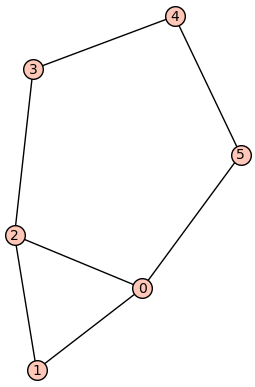

{0,1,}, {0,1,3,4,5,}
{1,}, {1,2,3,4,5,}
{3,}, {2,3,4,5,}
{5,}, {2,4,5,}
{0,3,}, {0,2,3,4,5,}
{0,5,}, {0,2,4,5,}


In [23]:
G = graphs.EmptyGraph()
for i in range(0, 5):
    G.add_edge(i, i+1)
G.add_edge(0, 5)
G.add_edge(0, 2)
#G.add_edge(3, 5)
G.show()
extensions = find_extensions(G, 4, 4)
for interval in extensions:
    print(str(interval))

Now that we have the possible neighborhoods for the new vertex, we define a function converting an interval into the graphs it represents.

In [26]:
import itertools

# Adds a vertex to G based on the given interval
# INPUT: a graph G and an interval of corresponding vertices that are viable neighborhoods for a new vertex v
# OUTPUT: a list of graphs that are G with a vertex added
def add_vertex(G, interval):
    
    finished_graphs = []
    bottom = interval.bottom
    top_not_in_bottom = []
    
    for vertex in interval.top:
        if not vertex in bottom:
            top_not_in_bottom.append(vertex)
    
    def recursive_search(G, bottom, top_not_in_bottom, neighborhood_size):
        
        #print(bottom, top_not_in_bottom, neighborhood_size)
        
        missing_spots = neighborhood_size - len(bottom)
        
        for missing_comb in itertools.combinations(top_not_in_bottom, missing_spots):
            
            neighborhood = bottom + list(missing_comb)
            
            new_G = G.copy()
            
            for vert in neighborhood:
                
                new_G.add_edge("v", vert)
                
            finished_graphs.append(new_G)
            
        if not len(bottom) + len(top_not_in_bottom) == neighborhood_size:
            recursive_search(G, bottom, top_not_in_bottom, neighborhood_size + 1)
    
    recursive_search(G, bottom, top_not_in_bottom, len(bottom))
    
    return finished_graphs

Testing this new function:

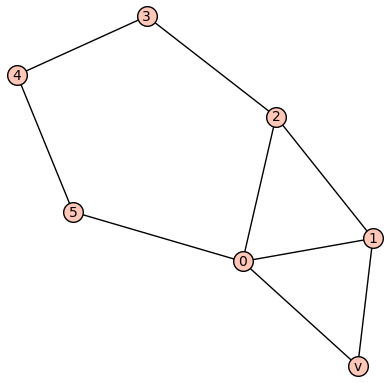

3
3


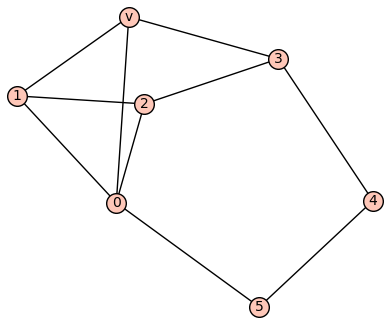

3
3


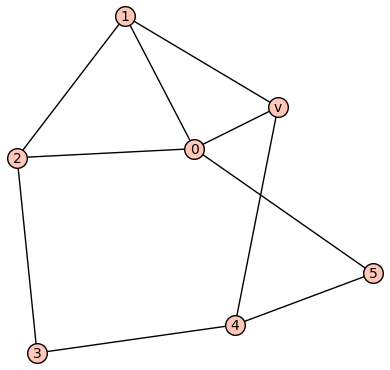

3
3


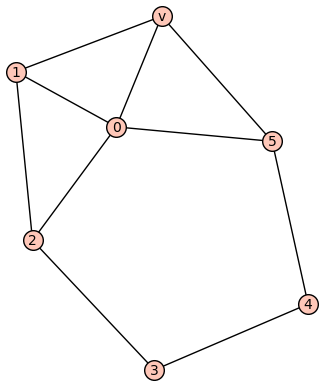

3
3


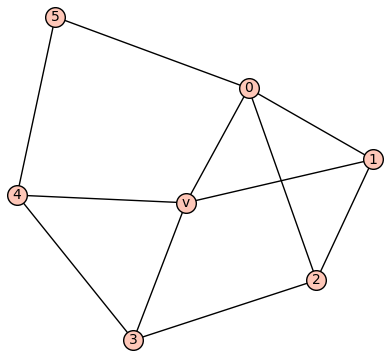

3
3


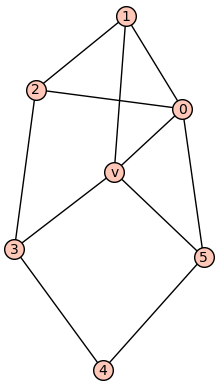

3
3


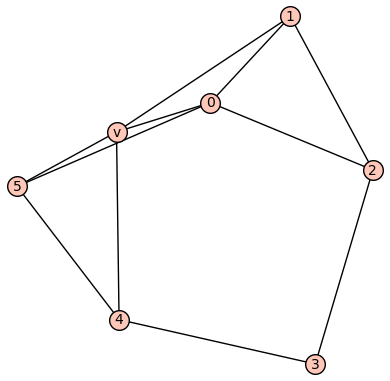

3
3


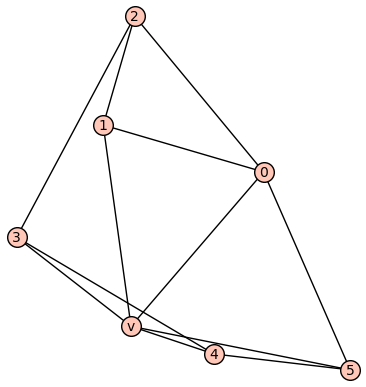

3
3


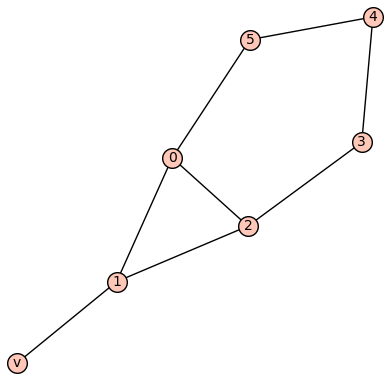

3
3


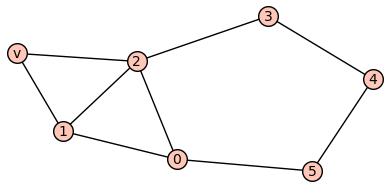

3
3


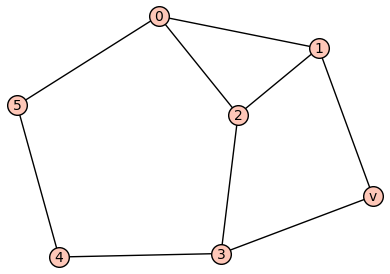

3
3


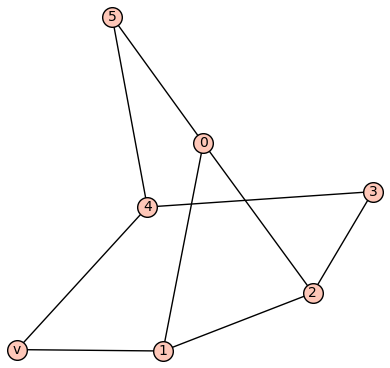

3
3


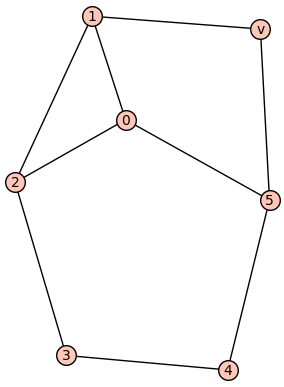

3
3


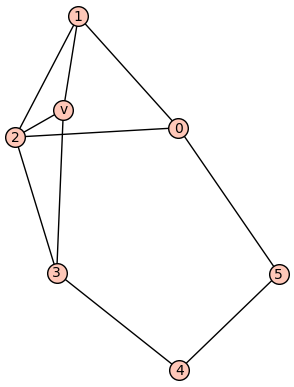

3
3


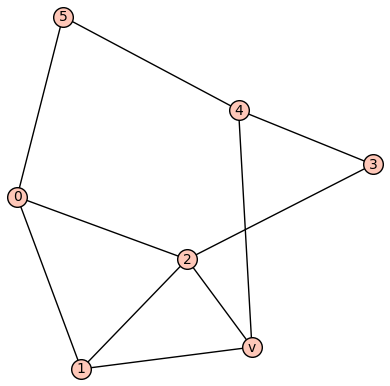

3
3


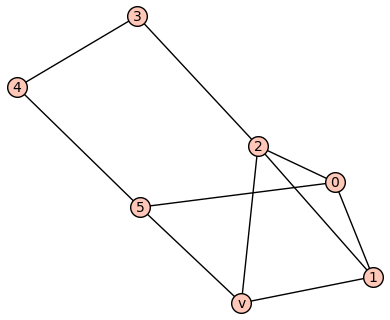

3
3


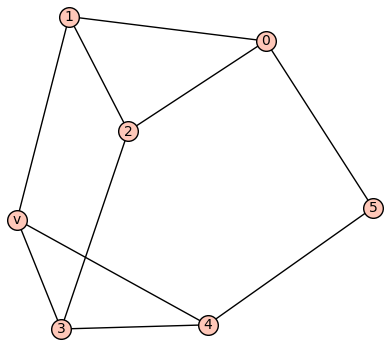

3
3


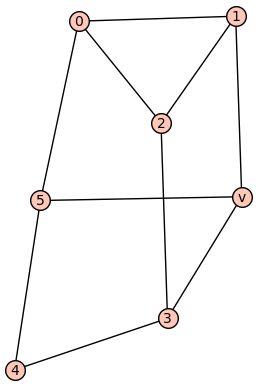

3
3


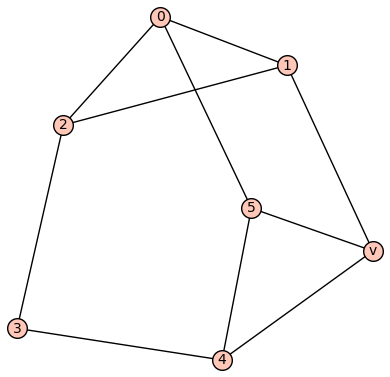

3
3


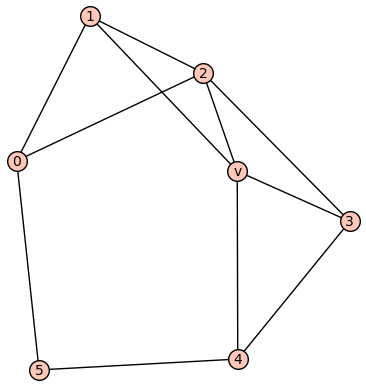

3
3


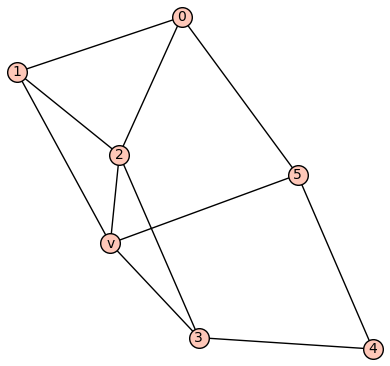

3
3


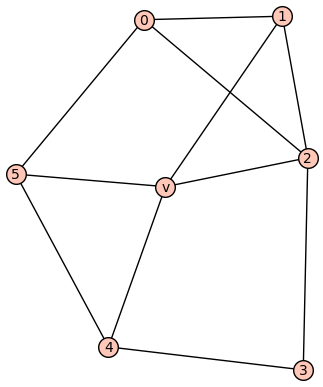

3
3


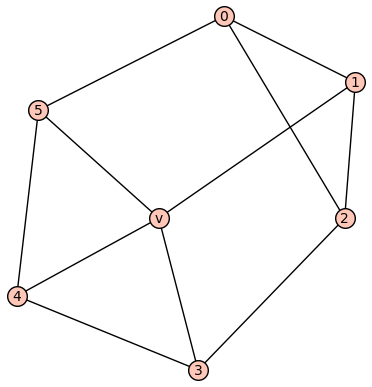

3
3


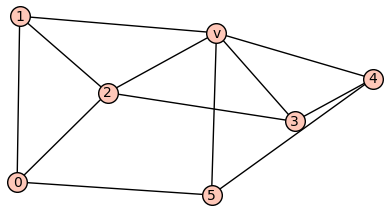

3
3


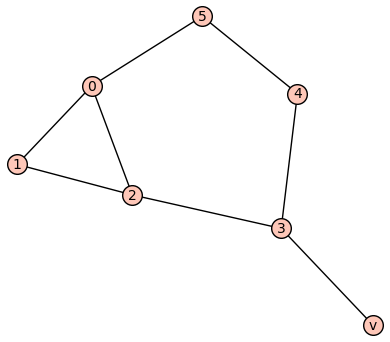

3
3


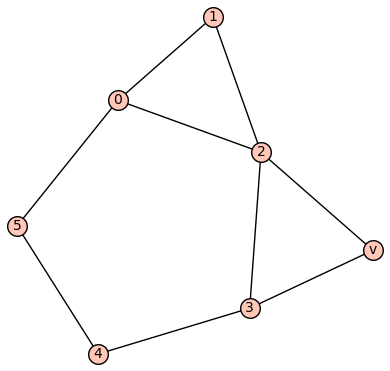

3
3


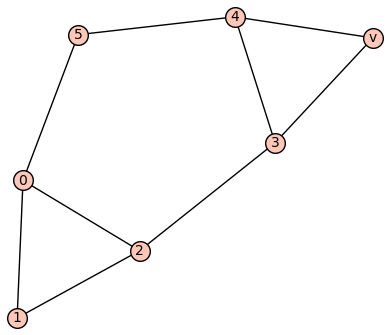

3
3


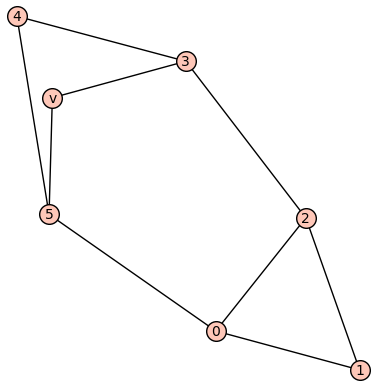

3
3


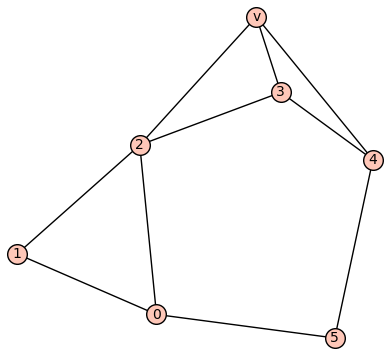

3
3


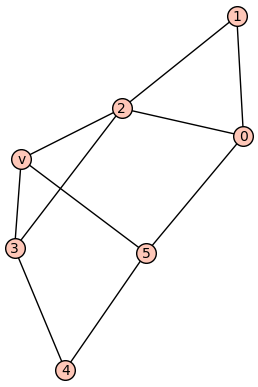

3
3


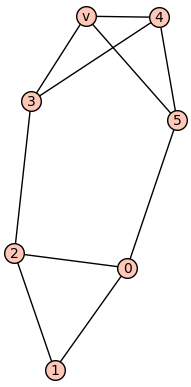

3
3


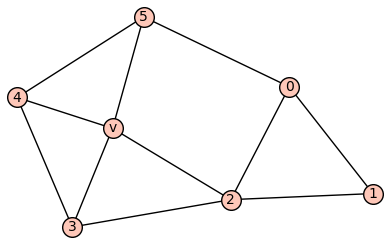

3
3


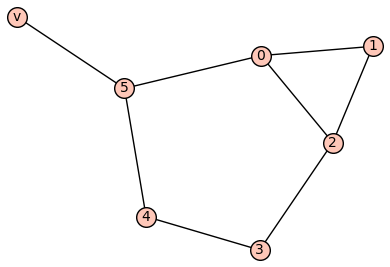

3
3


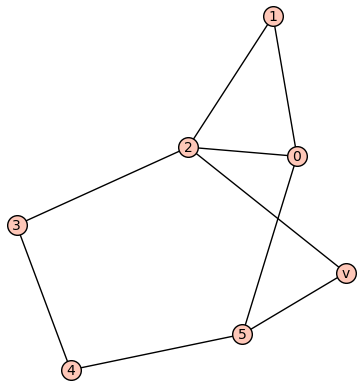

3
3


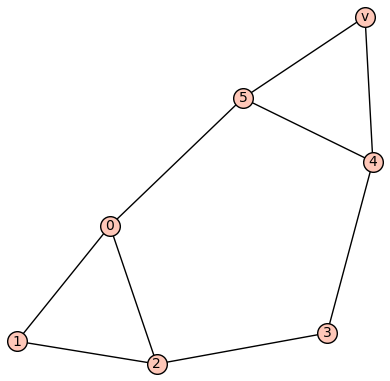

3
3


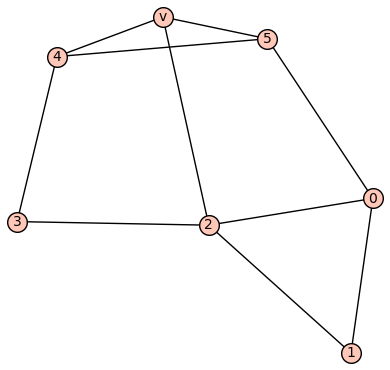

3
3


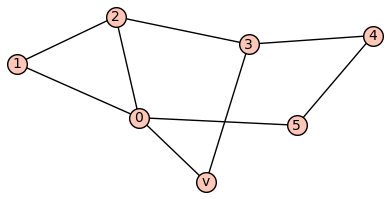

3
3


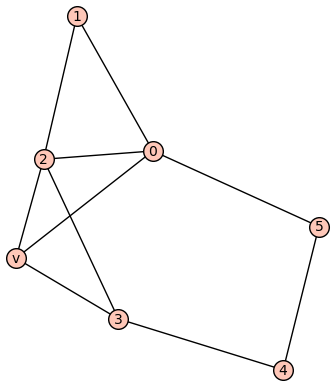

3
3


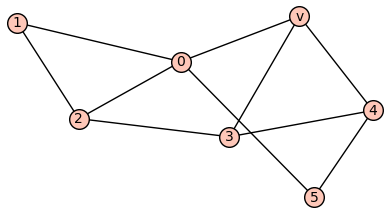

3
3


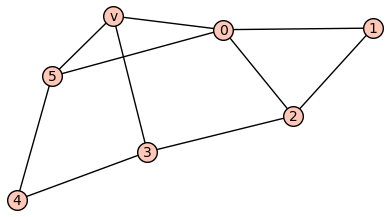

3
3


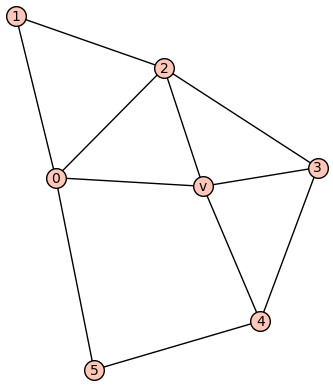

3
3


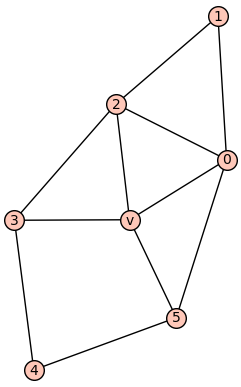

3
3


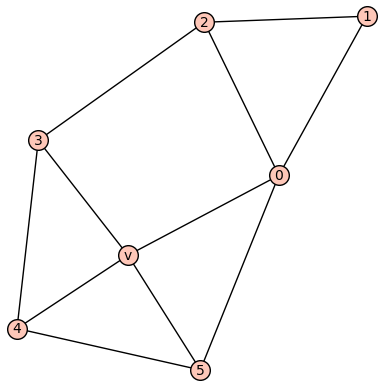

3
3


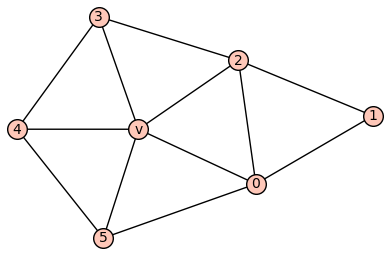

3
3


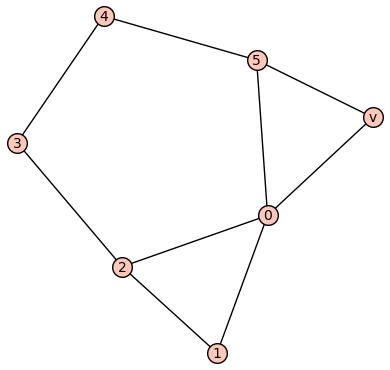

3
3


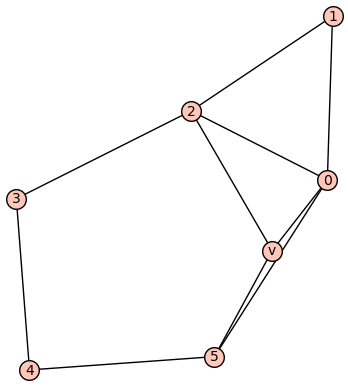

3
3


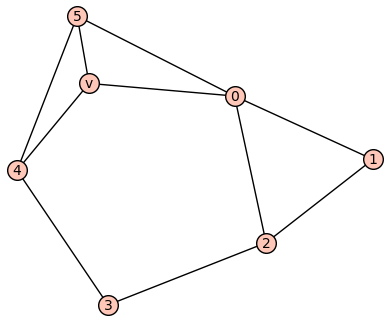

3
3


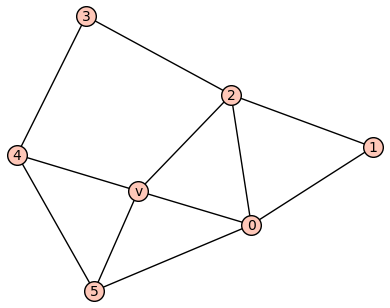

3
3


In [27]:
extended_graphs = []

for i in range(0, len(extensions)):
    new_graphs = add_vertex(G, extensions[i])

    for graph in new_graphs:
        extended_graphs.append(graph)
        
for graph in extended_graphs:
    graph.show()
    print(graph.clique_number())
    print(graph.complement().clique_number())